# **Fine-tune Pre-trained PaliGemma**  

## **PaliGemma -- Google's Cutting Edge Open Vision Language Model**

PaliGemma is a new family of vision language models from Google. PaliGemma can take in an image and text and output text.

The team at Google has released three types of models: the pre-trained(pt) models, the mix models, and the fine-tuned(ft) models, each with different resolutions and available in multiple precisions for convenience.

All models are released in the Hugging face Hub model repositories with their model cards and licenses and have transformers intergration.

## **What is PaliGemma ?**
PaliGemma is a family of vision language models with an architecture consisting of SigLIPSo400m as the image encoder and Gemma-2B as text encoder. SigLIP is a state of the art model that can understand both images and text. Like CLIP, it consists of an image and text encoder trained jointly. Similar to PaLI-3, the combined PaliGemma model is pre-trained on image-text data and can then easily be fine-tuned on downstream tasks, such as captioning or referring segementation. Gemma is a decoder only model for text generation. Combining the image encoder of SigLIP with Gemma using a linear adapter makes PaliGemma a powerful vision language model.


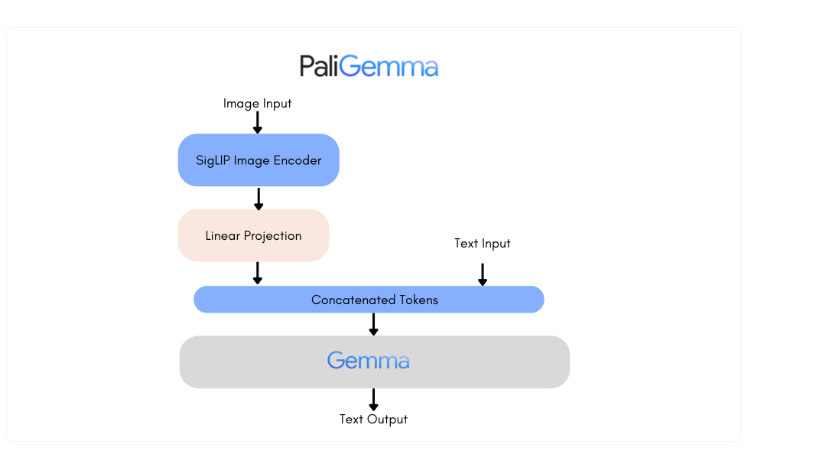

The models come in three different resolutions (224x224, 448x448, 896x896) and three different precisions (bfloat16, float16, and float32), Each repository contains the checkpoints for a given resolution and task, with three revisions for each of the available precisions. The main branch of each repository contains foat32 checkpoints, where the bflot16 and float16 revisions contain the corresponding precisions. There are separate repositories for models compatible with hugging face transformers and with the original JAX implementation.

As explained in detail further down, the high-resolution models require a lot more memory to run, because the input sequences are much longer. They may help with fine-grained tasks such as OCR, but the quality increase in small for most tasks. The 224 versions are perfectly fine for most purposes.

# **Model Capabilities**

PaliGemma is a single-turn vision language model not meant for conversational use, and it works best when fine-tuning to a specific usecase. We can configure which task the model will solve by conditioning it with task prefixes, such as "detect" or "segment". The pre-trained models were trained in this fashion to imbue them with a rich set of capabilities (question answering, captioning, segmenetation etc). However, they are not designed to be used directly, but to be transferred (by fine-tuning) to specific tasks using a similar prompt structure. For interactive testing, we can use the "mix" of family models, which have been fine-tuned on a mixture of tasks.

# **Image Captioning**

PaliGemma can caption images when prompted to. We can try various captioning prompts with the mix checkpoints to see how they respond.

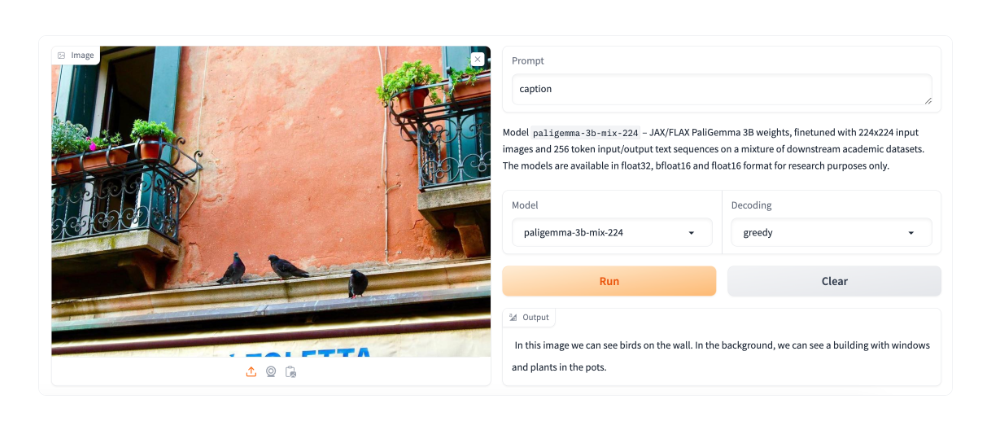

# **Visual Question Answering**

PaliGemma can answer questions about an image, simply pass your question along with the image to do so.

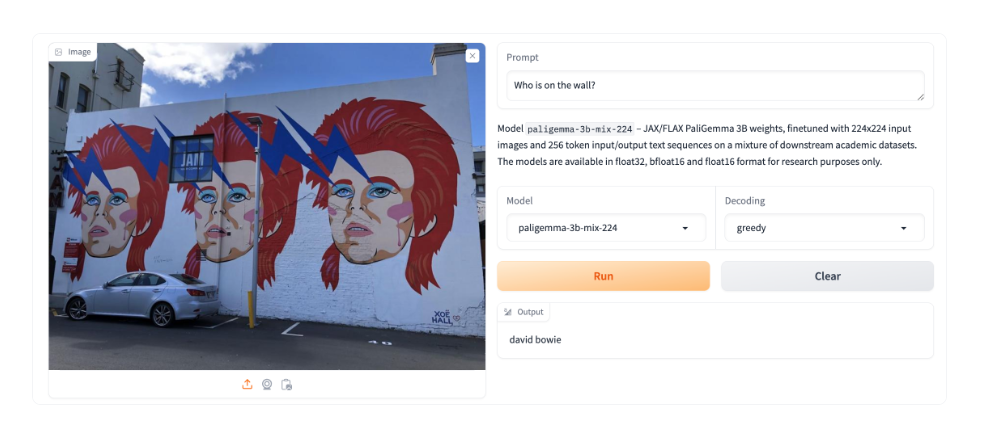

# **Detection**

PaliGemma can detect entities in an image using the detect [entity] prompt. It will output the location for the bounding box coordinates in the form of special <loc[value]> tokens, where value is a number that represents a normalized coordinate. Each detection is reprsented by four location coordinates in the order y_min, x_min, y_max, x-max, followed by the label that was detected in that box. To convert values to coordinates, we first need to divide the numbers by 10124, then multiply y by the image height and x by its width. This will give you the coordinates of the bounding boxes, relative to the original image size.

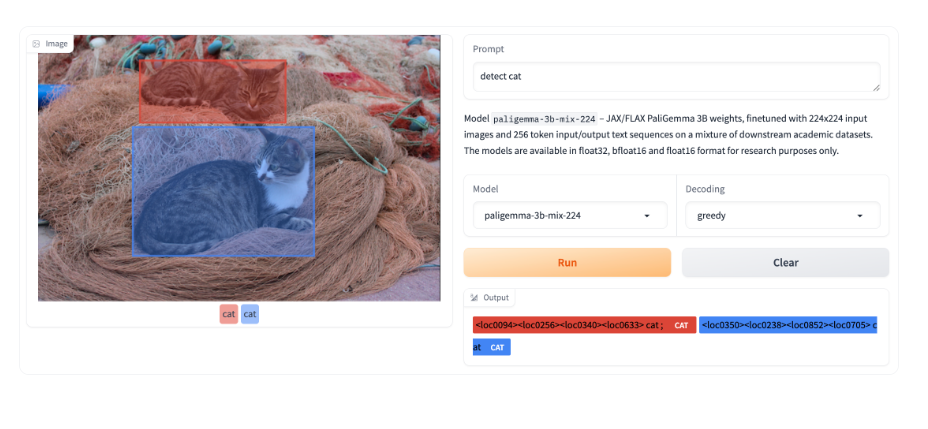

# **Referring Expression Segmentation**

PaliGemma mix checkpoints can also segment entities in an image when given the segement [entity] prompt. This is called referring expression segmentation, because we refer to the entities of interest using natural language descriptions. The output is a sequence of location and segmentation tokens. The location tokens represent a bounding box as described above. The segmenation tokens can be further processed to generated segmentation masks.

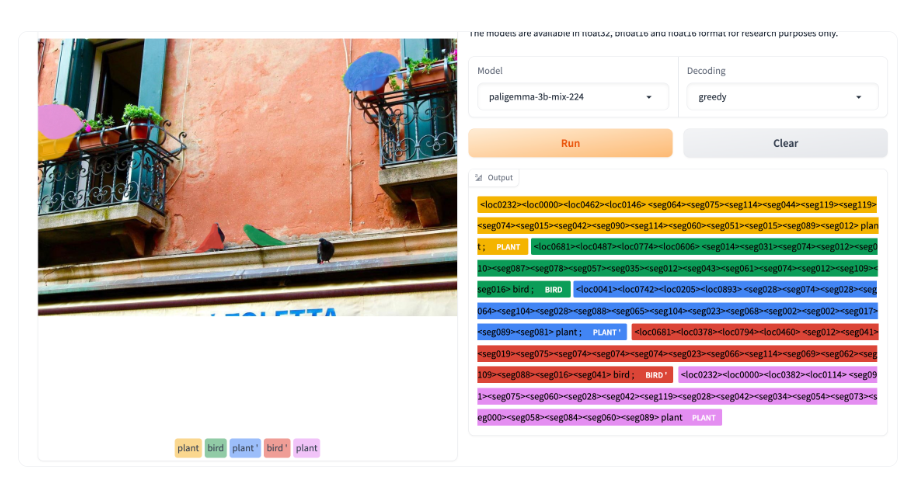

# **Document Understanding**

PaliGemma mix checkpoints have great document understanding and reaonsing capabilities.

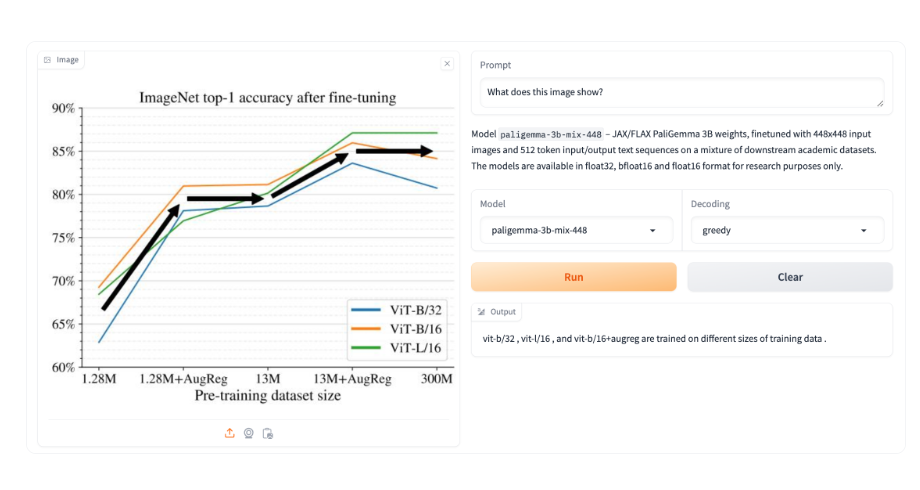

# **Fine Tuned Checkpoints**

In addition to the pre-trained and mix models, Google has released models already transferred to various tasks. They correspond to acadamic benchmarks that can be used by the research community to compare how they perform. Below, we can find a selected few. These models also come in different resolutions. We can check out the model card of any model for all metrics.

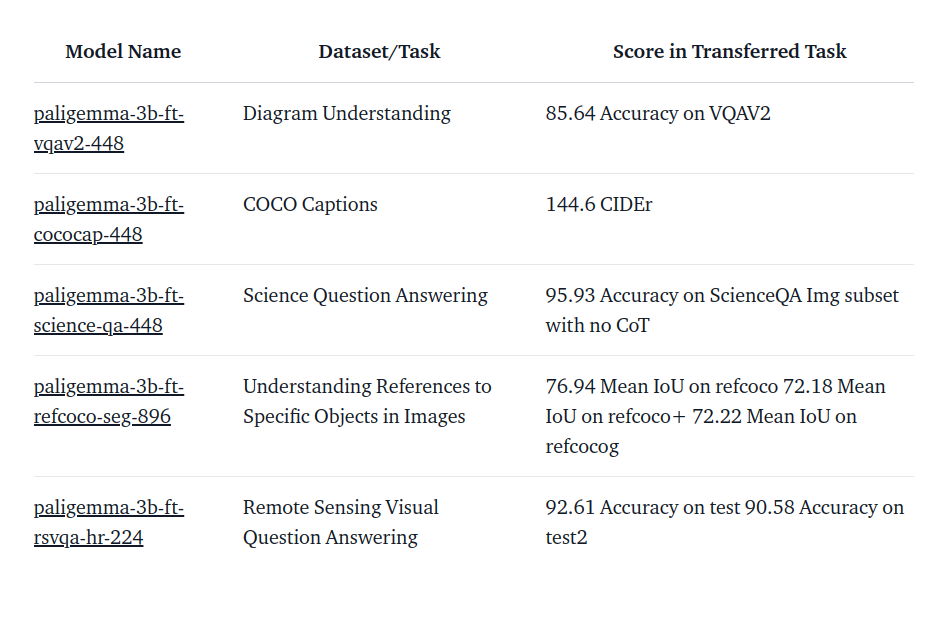

# **How to Run Inference**

To obtain access to the PaliGemma models, we need to accept the Gemma licence terms and conditions. If we already have access to other Gemma models in Hugging Face, we're good to go. Otherwise, we need to vist any of the PaliGemma models, and accept the licence if we agree with it. Once we have access, we need to authenticate either through notebook login or huggingface-clilogin.

# **Using Transformers**

We can use the PaliGemmaForConditionalGeneration class to infer with any of the released models. Simply preprocess the prompt and the image with the built-in processor and then pass the pre-processed inputs for generation.

In [ ]:
import torch
from PIL import Image
import requests

In [ ]:
pip install transformers

In [ ]:
pip install accelerate

In [ ]:
pip install datasets

In [ ]:
# we will authenticate to access the model using notebook_login()
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

model_id = "google/paligemma-3b-mix-224"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = AutoProcessor.from_pretrained(model_id,use_auth_token=True )

prompt = "What is on the flower?"
image_file = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/bee.jpg?download=true"
raw_image = Image.open(requests.get(image_file, stream=True).raw)
inputs = processor(prompt, raw_image, return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)

print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])


# **Parameter Efficient Fine Tuning (PEFT)**

Large Language Models (LLMs) based on the transformer architecture, like GPT, T5, and BERT have achieved state of the art results in various Natural Language Processing (NLP) tasks. They have also started foraying into other domains, such as Computer Vision (Vision Transformer, Stable Diffusion , Layout LM) and Audio (Whisper, XLS-R). The conventional paradigm is large scale pre-training on a generic web-scale data, followed by fine-tuning to downstream tasks. Fine Tuning these pre-trained LLMs on downstream datasets results in huge performance gains when compared to using the pre-trained LLMs out of the box (Zero-shot Inference, for example)

However, as model gets larger and larger, full fine-tuning becomes infeasible to train on consumer hardware. In addition, storing and deploying fine-tuned models independently for each downstream task becomes very expensive, because a fine-tuned models are the same size as the original pre-trained model. Parameter Efficient Fine-Tuning (PEFT) approaches are meant to address both problems.

Question :- **How does the fine tuned models has the same size as the original pre-trained models ?**

Large Language Models (LLMs) based on the transformer architecture, like GPT, T5, and BERT have achieved state of the art results in various Natural Language Processing (NLP) tasks. They have also started foraying into other domains, such as Computer Vision (Vision Transformers, Stable Diffusion, Layout LM) and Audio(Whisper, XLS-R). The conventional paradigm is large scale pretraining on a generic web-scale data, followed by fine tuning to downstream tasks. Fine-Tuning these pre-trained LLMs on downstream datasets results in huge performance gains when compared to using the pre-trained LLMs out of the box (Zero-shot inference, for example)

However, as model gets larger and larger, full fine-tuning becomes infeasible to train on consumer hardware. In addition, storing and deploying fine tuned models independently for each downstream task becomes very expensive, because fine-tuned models are the same size as the original pre-trained model. Parameter Efficient Fine-Tuning (PEFT) approaches are meant to address both problems.

`Question :- How does the fine tuned models has the same size as the original pre-trained models ? `

Fine tuned models have the same size as the original pre-trained models primarily due to the underlying architecture and parameter retention during fine-tuning process.

`Model Architecture Retention` :- When pre-trained models is fine-tuned, the architecture of the model (that is the layers, their types, and the connections between them) remains unchanged.This includes includes the same number of layers, the same type of layers (e.g convolutional, recurrent, transformer blocks), and the same connectivity patterns.

`'Parameter Retention' `:- The primary feature of fine-tuning is that it starts with the weights and biases of the pre-trained model. These parameters are already optimized to capture a broad understanding of the data (like language understanding in the case of language models or feature recognition in vision models). During fine-tuning, most or all of these parameters are slightly adjusted or entirely retained to specialize towards a specific task. The total count of parameters (weights and biases) thus remains the same as in the original model.

`'Gradient Update'` :- In fine-tuning, although the model parameters are updated, this update involves only slight modifications to the existing weights based on the gradients computed from the new task-specific data. The update rule typically involves backpropagation, where graidients are calculated for a loss function that is now tailored to a new task. Despite these updates, the dimensionality and the structure of the weight matrices and bias vectors do not change.


`Memory and Storage Requirements ` :- Since the architecture and the total number of parameters remain unchanged, the storage requirements for the fine-tuned model are the same as for the origial pre-trained model. This means that fine tuning does not redue the computational or memory footprint of the model, which is why deploying multiple fine-tuned versions of large models can become resource-intensive.

PEFT approaches only fine-tune a smaller of (extra) model parameters while freezing most parameters of the pre-trained LLMs there by greatly decreasing the computational and storage costs. This also overcomes the issues of catastrophic forgetting, a behaviour observed during the full finetuning of LLMs. PEFT approaches have also shown to be better than fine-tuning in the low-data regimes and generalize better to out of domain scenarios. It an be applied to various modalities example, image classification and stable diffusion dreambooth.

It also helps in portability where in users can tune models using PEFT methods to get tiny checkpoints worth a few MBs compared to the large checkpoints of full fine tuning. For example, e.g., bigscience/mt0-xxl takes up 40GB of storage and full fine tuning will lead to 40GB checkpoints for each downstream datasets where as using PEFT methods it would be just a few MBs for each downstream dataset all the while achieving comparable performance to full fine tuning. The small trained weights from PEFT approches are added on top of the pre-trained LLM. So the same LLM can be used for multiple tasks by adding small weights without having to replace the entire model.

In short, PEFT approaches enable you to get performance comparable to full fine-tuning while only having a small number of trainable parameters.


Now we are excited to introduce the hugging face PEFT library , which provides the latest parameters efficient fine tuning techniques seamlessly integrated with Hugging Face Transformers and Hugging Face Accelerate. This enables using the most popular and performant models from transformers coupled with the simiplicity and scalability of Accelerate. Below are the currently supported PEFT models.

- LoRA: LORA: LOW-RANK ADAPTATION OF LARGE LANGUAGE MODELS
- Prefix Tuning: P-Tuning v2: Prompt Tuning Can Be Comparable to - Fine-tuning Universally Across Scales and Tasks
- Prompt Tuning: The Power of Scale for Parameter-Efficient Prompt Tuning
P-Tuning: GPT Understands, Too


# **Usecases**

- We explore many interesting use cases here. These are a few of the most interesting ones:

- Using 🤗 PEFT LoRA for tuning bigscience/T0_3B model (3 Billion parameters) on consumer hardware with 11GB of RAM, such as Nvidia GeForce RTX 2080 Ti, Nvidia GeForce RTX 3080, etc using 🤗 Accelerate's DeepSpeed integration: peft_lora_seq2seq_accelerate_ds_zero3_offload.py. This means you can tune such large LLMs in Google Colab.

- Taking the previous example a notch up by enabling INT8 tuning of the OPT-6.7b model (6.7 Billion parameters) in Google Colab using 🤗
 PEFT LoRA and bitsandbytes:Open In Colab

- Stable Diffusion Dreambooth training using 🤗 PEFT on consumer hardware with 11GB of RAM, such as Nvidia GeForce RTX 2080 Ti, Nvidia GeForce RTX 3080, etc. Try out the Space demo, which should run seamlessly on a T4 instance (16GB GPU): smangrul/peft-lora-sd-dreambooth.

# **Training our model using 🤗 PEFT**

# **Imports**

In [ ]:
from transformers import AutoModelFor2SeqLM
from peft import get_pft_model, LoraConfig, TaskType

In [ ]:
model_name_or_path = 'bigscience/mto-large'
tokenizer_name_or_path = 'bigscience/mt0-large'

# **Creating config corresponding to the PEFT method**

In [ ]:
peft_config = LoraConfig(
    task_type = TaskType.SEQ_2_SEQ_LM, inference_mode = False, r = 8,lora_alpha = 32, lora_dropout = 0.1
)

# **wrapping base 🤗 Transformers model**

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_name_or_path)
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()
# output trainable params: 2359296 || all params : 1231940608 || trainable% = 0.1915

# **Save the model for Inference**


In [ ]:
model.save_pretrained("output_dir")

This will only save the incremental PEFT weights that were trained. For example, we can find the bigscience/TO_3B tuned using LoRA on the twitter complaints raft dataset. `smangrul/twitter_complaints_bigscience_T0_3B_LORA_SEQ_2_SEQ_LM.` Notice that it only contains 2 files: adapter_config.json and adapter_model.bin with the latter being just 19MB.

# **Load For Inference**

In [ ]:
from transformers import AuotoModelForSew2SeqLM
from peft import PeftModel, PeftConfig
peft_model_id = "smangrul/twitter_complaints_bigscience_T0_3B_LORA_SEQ_2_SEQ_LM"
config = PeftConfig.from_pretrained(peft_model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(config.base_model_name_or_path)
model = PeftModel.from_pretrained(model, peft_model_id)
tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path)

model = model.to(device)
model.eval()
inputs = tokenizer("Tweet text : @HondaCustSvc Your customer service has been horrible during the recall process. I will never purchase a Honda again. Label :", return_tensors="pt")

with torch.no_grad():
  outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=10)
  print(tokenizer.batch_decode(outputs.detach().cpu().numpy(), skip_special_tokens=True)[0])
# 'complaint'

# **LoRA - Low Rank Adaptation For LLMs**

# **Fine Tuning PaliGemma on VQAv2 Dataset**

In this notebook, we will fine-tine pre-trained PaliGemma on a small split of VQAv2 dataset. Let's get started by installing necessary libraries.

In [ ]:
import transformers
import datasets
import accelerate

In [ ]:
from datasets import load_dataset
ds = load_dataset('HuggingFaceM4/VQAv2', split="train[:10%]")

In [ ]:
cols_remove = ["question_type", "answers", "answers_type", "image_id", "question_id"]
ds = ds.remove_columns(cols_remove)

In [ ]:
split_ds = ds.train_test_split(test_size = 0.05)
train_ds = split_ds["test"]

In [ ]:
train_ds

# **Load the processor to pre-process the dataset**

In [ ]:
from transformers import PaliGemmaProcessor
model_id = "google/paligemma-3b-pt-224"
processor = PaliGemmaProcessor.from_pretrained(model_id)

We will preprocess our examples. We need to prepare a prompt template and pass the text input inside, pass it with batches of images to processor. Then we will set the pad tokens and image tokens to -100 to let the model ignore the. We will pass our preprocessed input as labels to make the model learn how to generate responses.

In [ ]:
import torch
device = "cuda"

image_token = processor.tokenizer.convert_tokens_to_ids("<image>")
def collate_fn(examples):
  texts = ["answer " + example["question"] for example in examples]
  labels= [example['multiple_choice_answer'] for example in examples]
  images = [example["image"].convert("RGB") for example in examples]
  tokens = processor(text=texts, images=images, suffix=labels,
                    return_tensors="pt", padding="longest",
                    tokenize_newline_separately=False)

  tokens = tokens.to(torch.bfloat16).to(device)
  return tokens

In [ ]:
""" examples = [
    {"question": "What is the capital of France?", "multiple_choice_answer": "Paris", "image": image1},
    {"question": "What is 2+2?", "multiple_choice_answer": "4", "image": image2},
    {"question": "Who wrote '1984'?", "multiple_choice_answer": "George Orwell", "image": image3}
]

texts = ["answer " + example["question"] for example in examples]

texts = [
    "answer What is the capital of France?",
    "answer What is 2+2?",
    "answer Who wrote '1984'?"
] """


Our dataset is a very general one and similar to many datasets that PaliGemma was trained with. In this case, we do not need to fine-tune the image encoder, the multi-modal projector but we will only fine-tune the text decoder.

In [ ]:
from transformers import PaliGemmaForConditionalGeneration
import torch
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype = torch.bfloat16).to(device)

for param in model.vision_tower.parameters():
  param.requires_grad = False
for param in model.multi_modal_projector.parameters():
  param.requires_grad = False

Alternatively, if we want to do LoRA and QLoRA fine-tuning, we can run below cells to load the adapter either in full precision or quantized.

In [ ]:
pip install peft

In [ ]:
from transformers import BitsAndBytesConfig
from peft import get_peft_model, LoraConfig


bnb_config = BitsAndBytesConfig(
    load_in_4bit = True,
    bnb_4bit_quant_type = "nf4",
    bnb_4bit_compute_type = torch.bfloat16

)

lora_config = LoraConfig(
    r=8,
    target_modules=["q_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"],
    task_type="CAUSAL_LM",
)
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, quantization_config=bnb_config, device_map={"":0})
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()
#trainable params: 11,298,816 || all params: 2,934,634,224 || trainable%: 0.38501616002417344

In [ ]:
from transformers import TrainingArguments
args=TrainingArguments(
            num_train_epochs=2, # number of times the entire training dataset will be passed through the model during training
            remove_unused_columns=False, # whether to remove columns not used by the model's forward method
            per_device_train_batch_size=4, # Number of training samples per batch for each device (e.g., GPU).
            gradient_accumulation_steps=4, # Number of steps to accumulate gradients before performing a backward/update pass.
            warmup_steps=2, # Number of steps to perform learning rate warmup.
            learning_rate=2e-5, # The initial learning rate for the optimizer.
            weight_decay=1e-6, # Weight decay (L2 regularization) to prevent overfitting.
            adam_beta2=0.999,
            logging_steps=100, # Number of steps between logging updates.
            optim="adamw_hf", # Specifies the optimizer to be used. "adamw_hf" refers to Hugging Face's AdamW optimizer.
            save_strategy="steps", # Strategy for saving checkpoints. "steps" means to save at regular intervals.
            save_steps=1000, # Number of steps between each checkpoint save
            push_to_hub=True, # Whether to push the model and metrics to the Hugging Face Hub.
            save_total_limit=1, # Maximum number of checkpoints to keep. Older checkpoints are deleted.
            output_dir="paligemma_vqav2", # Directory where the model checkpoints and other outputs are saved.
            bf16=True, # Whether to use bfloat16 precision for training.
            report_to=["tensorboard"], # report training metrics for tensorboard
            dataloader_pin_memory=False # Whether to pin memory in data loaders.
        )

In [ ]:
from transformers import Trainer

trainer = Trainer(
        model=model,
        train_dataset=train_ds ,
        data_collator=collate_fn,
        args=args
        )

In [ ]:
trainer.train()

In [ ]:
trainer.push_to_hub()

# **Fine-tuned PaliGemma Inference**

No we will see how to infer a PaliGemma fine-tuned model (using hugging face transfromers) We need the latest version of transformers library

In [ ]:
!pip install -q -U transformers

In [ ]:
# Let's login to Hugging Face
from huggingface_hub import notebook_login
notebook_login()

# **Let's load the model**

In [ ]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
model_id = "merve/paligemma_vqav2"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = AutoProcessor.from_pretrained("google/paligemma-3b-pt-224")

We have fine-tuned the model on visual question answering (VQAv2). Hence we will pass an image to the model and ask a question about it. Below is a rather challenging image for vision language models. Pretrained PailGemma responds below image and question with "antique"

In [ ]:
from PIL import Image
import requests

prompt = "what is behind the cat ?"
image_file = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cat.png?download=true"
raw_image = Image.open(requests.get(image_file, stream = True).raw)

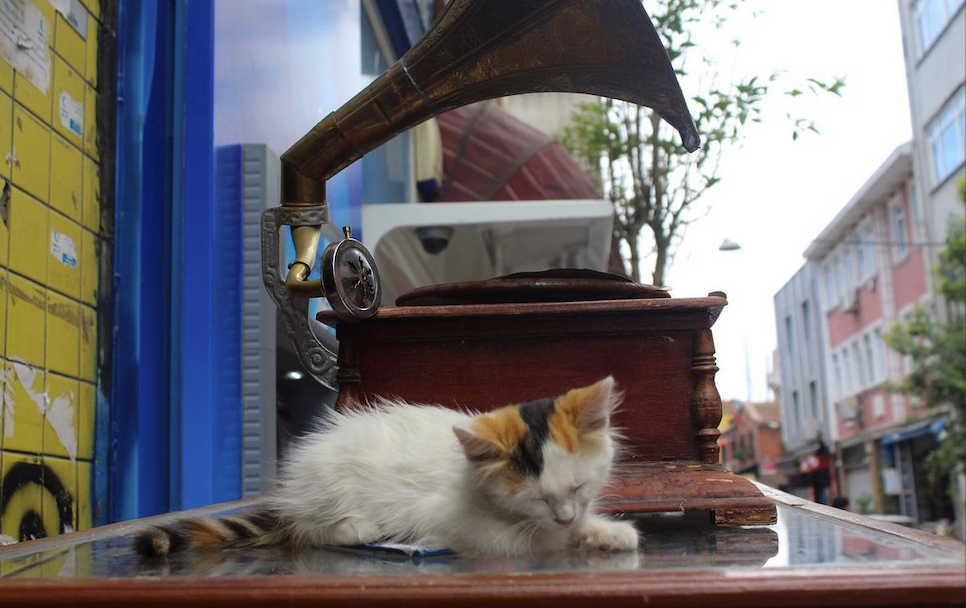

In [ ]:
inputs = processor(prompt, raw_image.convert("RGB"), return_tensors = "pt")
output = model.generate(**inputs, max_new_tokens = 20)
print(processor.decoder(output[0], skip_special_tokens = True)[len(prompt):])